## Imports and loading variables

In [1]:
import json
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary

from scipy.sparse import bsr_matrix, coo_matrix, csr_matrix, lil_matrix, identity

from matplotlib import pyplot as plt

In [2]:
with open('politics_tokens.json', 'r') as f:
    politics_tokens = json.load(f) 

In [3]:
print(len(politics_tokens))

925937


In [4]:
politics_dictionary = Dictionary.load("stored_variables/politics_dictionary_lda")

In [5]:
politics_corpus = [politics_dictionary.doc2bow(text) for text in politics_tokens]

In [6]:
with open('stored_variables/politics_tokens_auth_sample.json', 'r') as f:
    politics_tokens_auth = json.load(f) 

In [7]:
print(len(politics_tokens_auth))

561573


In [8]:
politics_corpus_auth = [politics_dictionary.doc2bow(text) for text in politics_tokens_auth]

In [9]:
politics_ldamodel26 = LdaModel.load('lda_models/politics_lda26.model')

In [10]:
for topic_num in range(26):
    print([politics_dictionary.id2token[i] for i,j in politics_ldamodel26.get_topic_terms(topic_num)])

['gun', 'guns', 'lol', 'control', 'men', 'check', 'ban', 'weapons', 'property', 'killed']
['for', 'money', 'more', 'on', 'tax', 'are', 'pay', 'have', 'you', 'would']
['illegal', 'for', 'legal', 'laws', 'crime', 'law', 'are', 'or', 'amendment', 'immigration']
['this', 'about', 'on', 'like', 'people', 'but', 'm', 'just', 'not', 'are']
['debates', 'great', 'please', 'ok', 'wonder', 'again', 'official', 'member', 'propaganda', 'removed']
['new', 'right', 'pro', 'polls', 'left', 'video', 'poll', 'wing', 'gay', 'senator']
['article', 'post', 'this', 'read', 'source', 'from', 'evidence', 'data', 'news', 'proof']
['she', 'her', 'hillary', 'for', 'woman', 'like', 'has', 'fox', 'emails', 'on']
['court', 'man', 'nice', 'damn', 'supreme', 'dude', 'union', 'executive', 'city', 'slavery']
['you', 'your', 'what', 'if', 're', 'not', 'do', 'are', 'have', 'can']
['bernie', 'sanders', 'hillary', 'clinton', 'trump', 'for', 'supporters', 'campaign', 'has', 'support']
['change', 'both', 'trade', 'climate', 

In [11]:
with open("stored_variables/politics_corpus_lda.pickle", 'rb') as f:
    politics_corpus_lda = pickle.load(f)

In [12]:
with open("stored_variables/politics_corpus_auth_lda.pickle", 'rb') as f:
    politics_corpus_auth_lda = pickle.load(f)

In [13]:
with open("stored_variables/auth_sample_r_politics_authors.json", 'r') as f:
    comment_auths = json.load(f) 

In [14]:
with open("stored_variables/user_subreddit_tf.pickle", "rb") as f:
    subreddit_tf = pickle.load(f)

In [15]:
with open("stored_variables/user_subreddit_df_mat.pickle", "rb") as f:
    subreddit_df_mat = pickle.load(f)

In [16]:
with open("stored_variables/user_subreddit_tf_auths.pickle", "rb") as f:
    author_names = pickle.load(f)

In [17]:
with open("stored_variables/user_subreddit_tf_subreddit_names.pickle", "rb") as f:
    subreddit_reverse_dict = pickle.load(f)

## Top topics in each dataset

In [30]:
top_topic_by_doc = []

for doc_topics in politics_corpus_lda:
    topic_list_doc = sorted(doc_topics, key = lambda x : x[1], reverse = True)
    top_topic_by_doc.append(topic_list_doc[0][0])
    

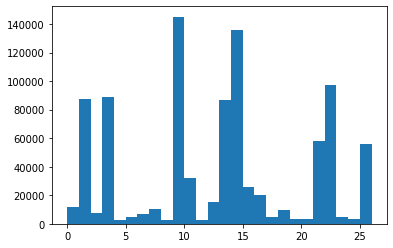

In [31]:
plt.hist(top_topic_by_doc, bins = list(range(27)))
plt.show()

In [32]:
top_topic_by_doc_auth = []

for doc_topics in politics_corpus_auth_lda:
    topic_list_doc = sorted(doc_topics, key = lambda x : x[1], reverse = True)
    top_topic_by_doc_auth.append(topic_list_doc[0][0])
    

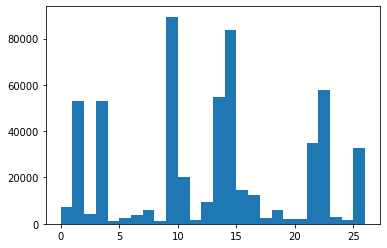

In [33]:
plt.hist(top_topic_by_doc_auth, bins = list(range(27)))
plt.show()

### Look at authors' subreddit history

In [18]:
comment_auths[:5]

['boy_aint_right', 'Euphemism', 'fadka21', 'groovyinutah', 'kajunkennyg']

In [18]:
author_reverse_dict = {author_names[i]:i for i in range(len(author_names))}

In [22]:
num_sanders = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['sandersforpresident']]) for k in author_names}
num_trump = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['the_donald']]) for k in author_names}
num_clinton = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['hillaryclinton']]) for k in author_names}


In [23]:
for k in list(num_sanders.keys())[:50]:
    print(k + ": " + str(num_sanders[k]))

SolarBear: 0
look: 83
Killfile: 3
Fazookus: 0
markedtrees: 0
wolf550e: 0
maxwellhill: 0
wockyman: 0
Masiosare: 0
Othello: 0
ndiin: 0
stacijon: 0
SwellJoe: 0
cqxray: 0
CalvinR: 0
darkon: 0
blindmikey: 69
adremeaux: 4
MauriceReeves: 0
Suppafly: 2
curlymo: 0
whtevn: 103
Laminar: 0
Hoodwink: 0
FenPhen: 0
Independent: 28
greenknight: 0
fvf: 0
daimposter: 135
ezekiel: 0
jwcrubau: 0
MarginalMeaning: 0
sekyuritei: 111
buddhahat: 0
VoodooIdol: 0
visarga: 0
Edgeoforever: 0
SteveAM1: 0
gordo65: 0
twsmith: 1
StuffMaster: 0
gehenom: 0
DudeAsInCool: 1
mr_luc: 2
mossman: 0
akise: 0
peridyn: 0
vemrion: 0
judgej2: 0
snookums: 0


In [24]:
comment_threshold = 1

In [25]:
[num_sanders[a] for a in comment_auths[:10]]

[4, 45, 0, 0, 5, 0, 45, 5, 0, 4]

In [26]:
sanders_user_indices = [i for i in range(len(comment_auths)) if num_sanders[comment_auths[i]] >= comment_threshold]
trump_user_indices = [i for i in range(len(comment_auths)) if num_trump[comment_auths[i]] >= comment_threshold]
clinton_user_indices = [i for i in range(len(comment_auths)) if num_clinton[comment_auths[i]] >= comment_threshold]

In [27]:
print(sanders_user_indices[:40])
print(trump_user_indices[:40])
print(clinton_user_indices[:40])

[0, 1, 4, 6, 7, 9, 14, 18, 21, 23, 29, 33, 36, 38, 39, 41, 42, 43, 44, 45, 48, 49, 52, 56, 61, 62, 67, 69, 77, 79, 81, 82, 83, 84, 86, 91, 92, 104, 105, 106]
[1, 4, 6, 7, 14, 18, 21, 23, 39, 48, 49, 51, 52, 53, 56, 57, 77, 81, 84, 94, 104, 105, 106, 122, 126, 135, 141, 158, 161, 162, 163, 175, 180, 191, 197, 214, 221, 222, 224, 235]
[137, 145, 148, 164, 175, 233, 275, 322, 323, 325, 337, 341, 342, 343, 344, 345, 346, 347, 348, 349, 354, 357, 366, 370, 371, 373, 382, 397, 409, 440, 444, 447, 449, 463, 465, 474, 505, 558, 561, 564]


In [28]:
print(len(sanders_user_indices))
print(len(trump_user_indices))
print(len(clinton_user_indices))

319691
192446
107019


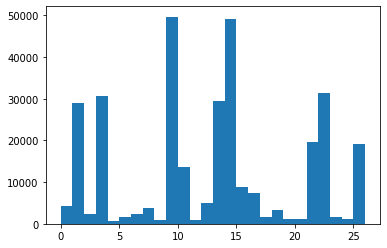

In [34]:
plt.hist([top_topic_by_doc_auth[i] for i in sanders_user_indices], bins = list(range(27)))
plt.show()

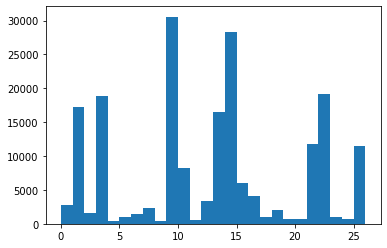

In [35]:
plt.hist([top_topic_by_doc_auth[i] for i in trump_user_indices], bins = list(range(27)))
plt.show()

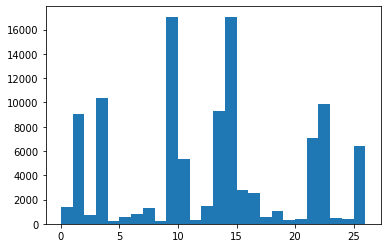

In [36]:
plt.hist([top_topic_by_doc_auth[i] for i in clinton_user_indices], bins = list(range(27)))
plt.show()

In [37]:
comment_threshold1 = 50

In [38]:
sanders_user_indices1 = [i for i in range(len(comment_auths)) if num_sanders[comment_auths[i]] >= comment_threshold1]
trump_user_indices1 = [i for i in range(len(comment_auths)) if num_trump[comment_auths[i]] >= comment_threshold1]
clinton_user_indices1 = [i for i in range(len(comment_auths)) if num_clinton[comment_auths[i]] >= comment_threshold1]

In [39]:
print(len(sanders_user_indices1))
print(len(trump_user_indices1))
print(len(clinton_user_indices1))

119182
37316
17381


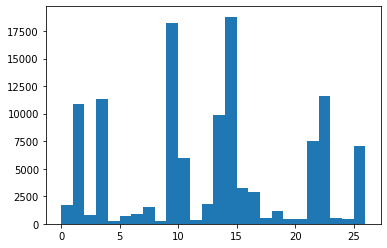

In [40]:
plt.hist([top_topic_by_doc_auth[i] for i in sanders_user_indices1], bins = list(range(27)))
plt.show()

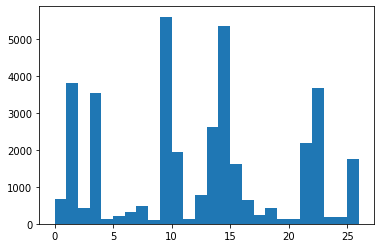

In [41]:
plt.hist([top_topic_by_doc_auth[i] for i in trump_user_indices1], bins = list(range(27)))
plt.show()

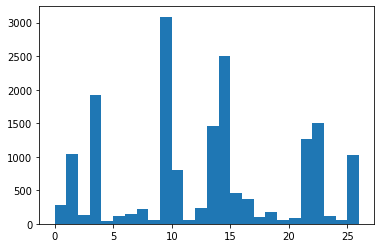

In [42]:
plt.hist([top_topic_by_doc_auth[i] for i in clinton_user_indices1], bins = list(range(27)))
plt.show()

In [43]:
none_user_indices = list(set(range(len(comment_auths))).difference(
    sanders_user_indices).difference(
    trump_user_indices).difference(
    clinton_user_indices)) 
                     

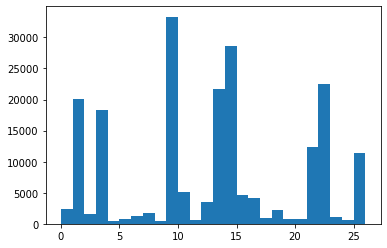

In [44]:
plt.hist([top_topic_by_doc_auth[i] for i in none_user_indices], bins = list(range(27)))
plt.show()